### Install required libraries

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpimg
from PIL import Image
from pandas.plotting import scatter_matrix

### Read data file 

In [2]:
df=pd.read_csv('data_new_county.csv')

### Print dataset

In [3]:
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County


### Check for missing values

In [4]:
df.isnull().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
county                  0
dtype: int64

### Data Statistical Summary

In [5]:
df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19780.000000,19980.000000,19980.000000,19980.000000,19980.000000
mean,10166.746997,-119.495148,35.571717,28.141942,2645.647397,537.913600,1432.461662,499.742593,3.871367,203516.024575
std,5966.626914,1.968704,2.134756,12.267877,2204.600117,424.311973,1143.526778,385.150544,1.907088,113405.625056
min,0.000000,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5036.750000,-121.582500,33.930000,18.000000,1444.000000,295.000000,786.000000,278.000000,2.555100,118600.000000
50%,10035.500000,-118.450000,34.220000,28.000000,2126.000000,433.000000,1168.000000,408.000000,3.526800,176550.000000
75%,15064.250000,-117.990000,37.650000,36.000000,3158.000000,646.250000,1737.000000,604.000000,4.764100,258425.000000
max,20639.000000,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Drop Unnamed Column And Nan values

In [6]:
df.dropna(inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

### Describe Total Bedroom

In [7]:
df['total_bedrooms'].describe()

count    19780.000000
mean       537.913600
std        424.311973
min          2.000000
25%        295.000000
50%        433.000000
75%        646.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

### Histogram of different features

Distribution of features over the dataset is represented in this histogram.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

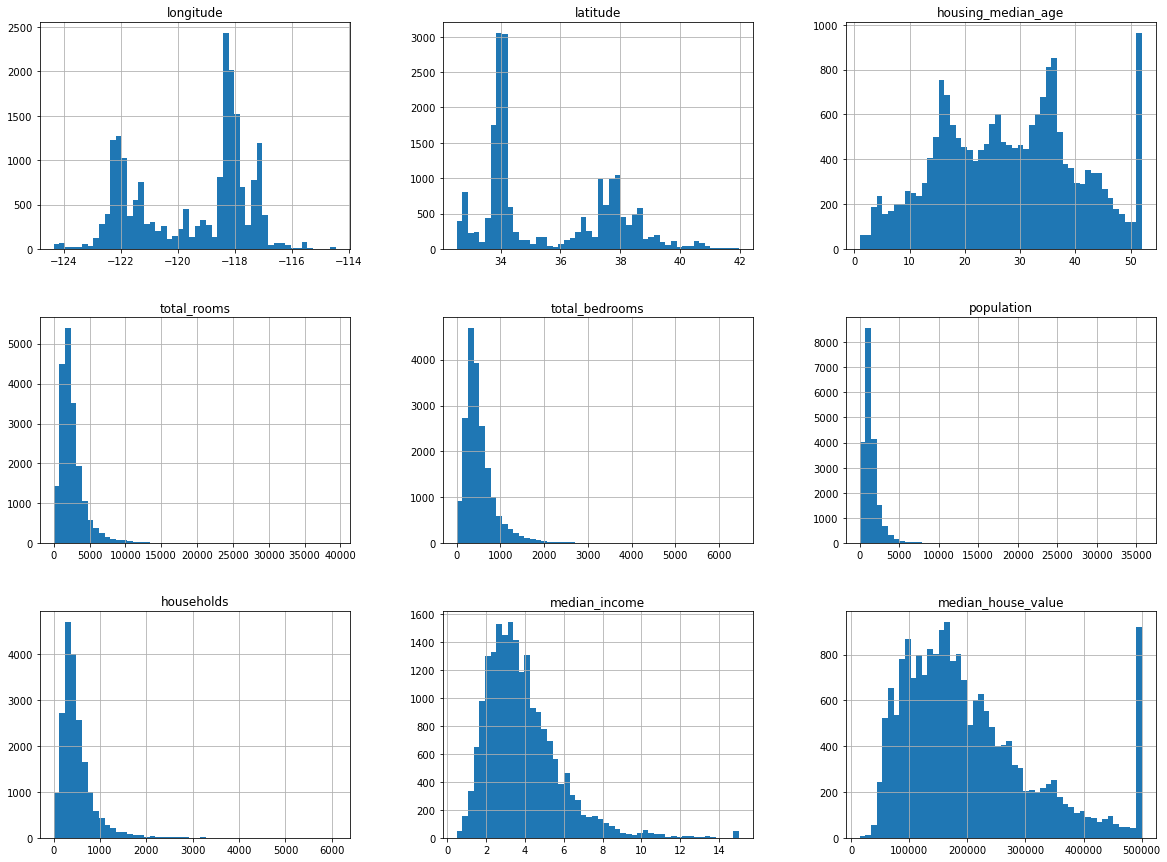

In [8]:
#For understanding the frequency distribution for each of the input features
df.hist(bins=50,figsize=(20,15))

### Ocean proximity value count

Calculating the count of houses with respect to ocean proximity.

In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     9032
INLAND        6417
NEAR OCEAN    2542
NEAR BAY      1784
ISLAND           5
Name: ocean_proximity, dtype: int64

### Bar Graph for house proximity to ocean

The calculated count is described as a bar graph.

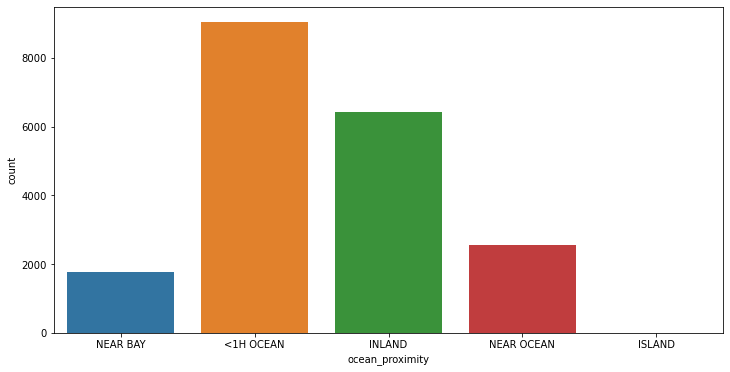

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='ocean_proximity',data=df)
plt.show()

### Visualize housevalue with respect to ocean proximity -  BoxPlot

This visualization helps us to understand the value of house with respect to ocean proximity.
From the graph, we can interpret that house value increases when it is closer to the ocean. Houses in island has the maximum house value.

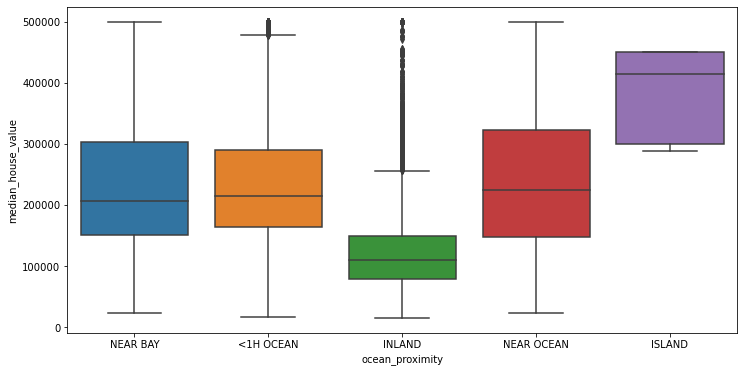

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df)
plt.show()

### Visualize households with respect to ocean proximity

From this graph we can understand that ocean proximity does not have much impact on household population.

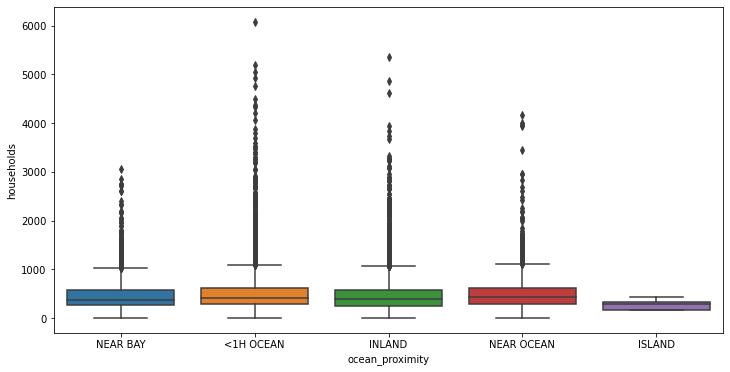

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ocean_proximity',y='households',data=df)
plt.show()

### Visualize housing median age value with respect to ocean proximity

Housing median age is the average age of the house. Here we can infer that that houses in inland are newer compared to the rest, whereas houses in island are the oldest of all.

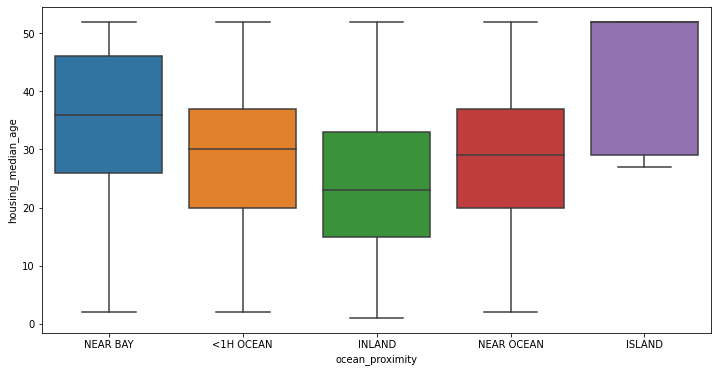

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ocean_proximity',y='housing_median_age',data=df)
plt.show()

### Population distribution across California

This helps us understand the population distribution across California using the latitude and longitude of the house.

In [14]:
california_img=Image.open('/home/ec2-user/cali_img.jpeg')
coords = ((df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max()))

df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=coords, alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/ec2-user/cali_img.jpeg'

### Plotting spatial data on California map

The map is color-coded based on ocean proximity and mapped with respect to the latitude and longtitude of the house. This helps to interpret the distribution of houses based on ocean proximity.

In [ ]:
plt.figure(figsize = (30,15))
ax=sns.scatterplot(x='longitude', y='latitude',data = df ,hue='ocean_proximity' ,alpha = 0.5)
ax.set_title('Plotting Spatial Data on California Map')
ax.set_xlim(coords[0],coords[1])
ax.set_ylim(coords[2],coords[3])
ax.imshow(california_img, zorder=0, extent = coords, aspect= 'equal')
plt.show()

### Bar graph for median house value vs median income

This graph shows the result of binning the median income  into 5 categories, and plot the median house value against the median income

<AxesSubplot:>

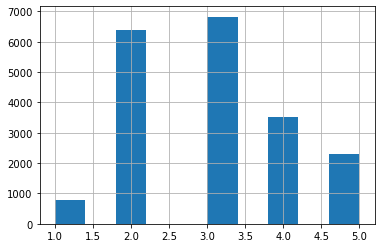

In [15]:
df['income_cat']=pd.cut(df['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
df['income_cat'].hist()

### Correlation Analysis

We use this graph to show the stastical relation between the features of the dataset.

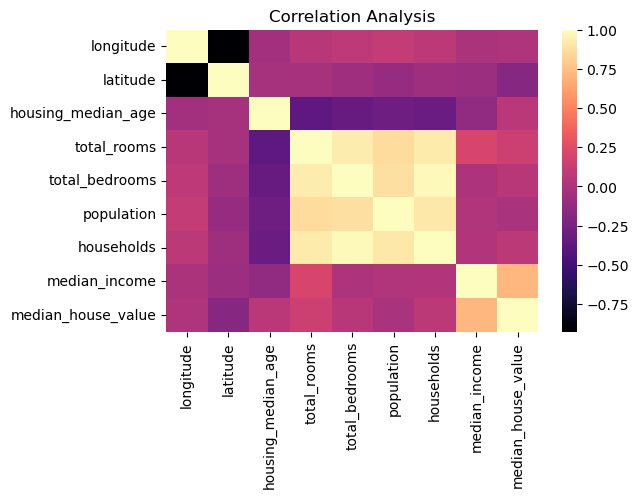

In [16]:
corr = df.corr()
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,annot=False,lw=0,linecolor='white',fmt = "0.2f", cmap="magma")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

### Scatter matrix

This graph shows the scatter matrix For median house value, housing median age, income, and total Bedrooms.

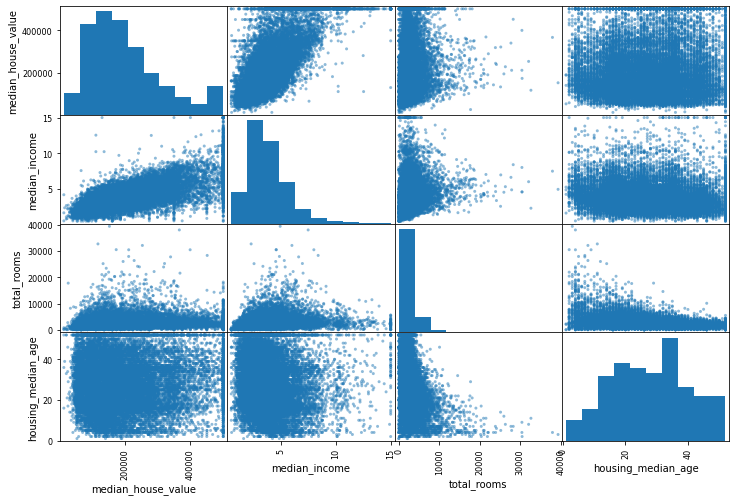

In [17]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

### Print Dataset

In [18]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19975,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Yuba County,2
19976,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Yuba County,2
19977,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Yuba County,2
19978,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Yuba County,2


### Average income and house value of each county

In [19]:
X=df.groupby('county')['median_house_value','median_income'].mean().sort_values(by='median_house_value',ascending=False)

C:\Users\uditg\AppData\Local\Temp/ipykernel_2752/2837276046.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X=df.groupby('county')['median_house_value','median_income'].mean().sort_values(by='median_house_value',ascending=False)


### Plot top 5 counties with highest median house value

This graph shows that the Marin county has the higest house value followed by San Mateo, Santa Clara, Santa Cruz and Orange County respectively.

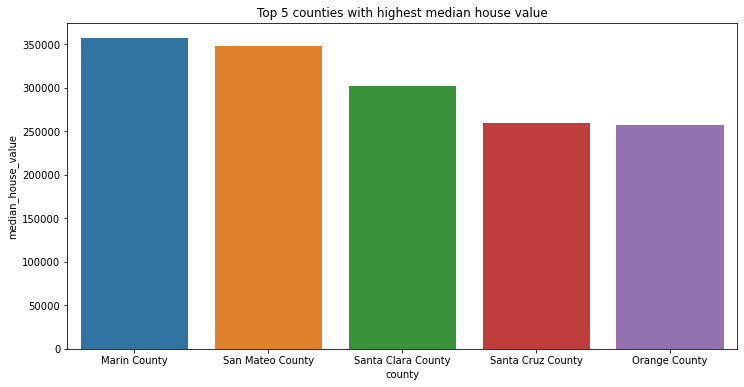

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=X.index[:5],y=X['median_house_value'][:5],data=X)
plt.title('Top 5 counties with highest median house value')
plt.show() 

### Plot top 5 counties with highest median income

From the graph we can interpret that Marin county again has the higest median income and Santa Cruz stands fifth.

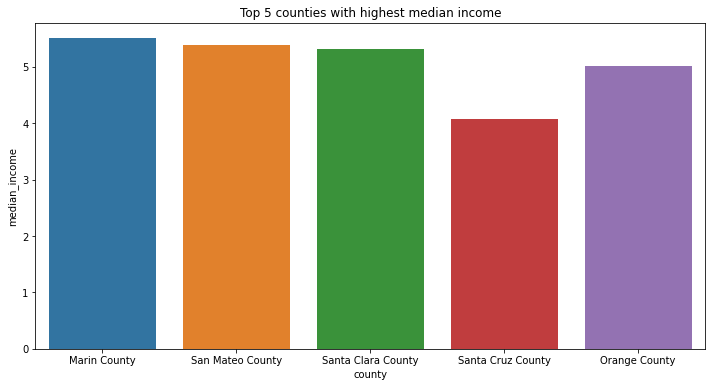

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=X.index[:5],y=X['median_income'][:5],data=X)
plt.title('Top 5 counties with highest median income')
plt.show()

### Data Preprocessing

In the following steps, we preprocess our data based on the following criterias:
<ul>
<li>Adding additional input feature: Population/Room based on each county</li>
<li>Normalizing the Data for better prediction</li>
<li>Converting categorical features to numerical features using One-Hot Encoding</li>
</ul>

### Group by county and sum the total population of each county and sum of total rooms

In [22]:
X=df.groupby('county')['population','total_rooms'].sum().sort_values(by='population',ascending=False).reset_index()
X['population/room']=(X.population/X.total_rooms)

C:\Users\uditg\AppData\Local\Temp/ipykernel_2752/378236551.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X=df.groupby('county')['population','total_rooms'].sum().sort_values(by='population',ascending=False).reset_index()


### Data Merging

In [23]:
df.merge(X[['county', 'population/room']],how='left',on='county')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county,income_cat,population/room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County,5,0.509078
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County,5,0.509078
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County,5,0.509078
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County,4,0.509078
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County,3,0.509078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19775,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Yuba County,2,0.570221
19776,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Yuba County,2,0.570221
19777,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Yuba County,2,0.570221
19778,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Yuba County,2,0.570221


### Copying data columns required to a new dataframe

In [24]:
df_new=df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity', 'county']]
df_new.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County


### Normalizing the data

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']]=scaler.fit_transform(df_new[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']])
df_new.head()

c:\Users\uditg\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county
0,0.784314,0.022331,0.019711,0.008941,0.020395,0.539668,0.902266,NEAR BAY,Alameda County
1,0.392157,0.180503,0.171349,0.067210,0.186842,0.538027,0.708247,NEAR BAY,Alameda County
2,1.000000,0.037260,0.029179,0.013818,0.028783,0.466028,0.695051,NEAR BAY,Alameda County
3,1.000000,0.032352,0.036163,0.015555,0.035691,0.354699,0.672783,NEAR BAY,Alameda County
4,1.000000,0.041330,0.043148,0.015752,0.042270,0.230776,0.674638,NEAR BAY,Alameda County


### One hot encoding

In [26]:
df_new=pd.get_dummies(df_new,columns=['ocean_proximity','county'],drop_first=True)
df_new.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,...,county_Sonoma County,county_Stanislaus County,county_Sutter County,county_Tehama County,county_Trinity County,county_Tulare County,county_Tuolumne County,county_Ventura County,county_Yolo County,county_Yuba County
0,0.784314,0.022331,0.019711,0.008941,0.020395,0.539668,0.902266,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.392157,0.180503,0.171349,0.067210,0.186842,0.538027,0.708247,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.000000,0.037260,0.029179,0.013818,0.028783,0.466028,0.695051,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.000000,0.032352,0.036163,0.015555,0.035691,0.354699,0.672783,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,0.041330,0.043148,0.015752,0.042270,0.230776,0.674638,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
len(df_new)

19780

In [29]:
#Output feature: median_house_value
y=df_new['median_house_value']
X=df_new.drop('median_house_value',axis=1)


In [30]:
#test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#train model
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [51]:
lin = LinearRegression()
lin.fit(X_train,y_train)

print("Train accuracy:", (lin.score(X_train,y_train)))
print("Test accuracy:", (lin.score(X_test,y_test)))

Y_pred = lin.predict(X_test)

r2_Lin = r2_score(y_test, Y_pred)
rms_Lin = mean_squared_error(y_test, Y_pred, squared=False)
mae_Lin = mean_absolute_error(y_test, Y_pred)
print()
print(f"R^2 score of model is {r2_Lin}")
print(f"Root mean squared error is {rms_Lin}")
print(f"Mean absolute error is {mae_Lin}")


Train accuracy: 0.6891297984760104
Test accuracy: 0.6824648368273052

R^2 score of model is 0.6824648368273052
Root mean squared error is 0.13406007636095335
Mean absolute error is 0.09353275742011763


In [49]:

rf = RandomForestRegressor(n_estimators=100, random_state=100, criterion="mse", max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train,y_train)

print("Training accuracy:",(rf.score(X_train,y_train)))
print("Test accuracy:",(rf.score(X_test,y_test)))

Y_pred = rf.predict(X_test)

r2_rf = r2_score(y_test, Y_pred)
rms_rf =mean_squared_error(y_test, Y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, Y_pred)
print()
print(f"R^2 score of model is {r2_rf}")
print(f"Root mean squared error is {rms_rf}")
print(f"Mean absolute error is {mae_rf}")


Training accuracy: 0.8176534815891463
Test accuracy: 0.7180846324334069

R^2 score of model is 0.7180846324334069
Root mean squared error is 0.12631732644667426
Mean absolute error is 0.08598753152522001


In [46]:
xg = XGBRegressor(max_depth=7)
# xg = XGBRegressor()
xg.fit(X_train,y_train)

print("Training accuracy:",(xg.score(X_train,y_train)))
print("Test accuracy:",(xg.score(X_test,y_test)))

Y_pred = xg.predict(X_test)

r2_xg = r2_score(y_test, Y_pred)
rms_xg = mean_squared_error(y_test, Y_pred, squared=False)
mae_xg = mean_absolute_error(y_test, Y_pred)
print()
print(f"R^2 score of model is {r2_xg}")
print(f"Root mean squared error is {rms_xg}")
print(f"Mean absolute error is {mae_xg}")

Training accuracy: 0.9108090564645754
Test accuracy: 0.7598957705550069

R^2 score of model is 0.7598957705550069
Root mean squared error is 0.11657447143530482
Mean absolute error is 0.07709245752950147


In [43]:
#Decision Tree
dt = DecisionTreeRegressor(splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=100, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
dt.fit(X_train,y_train)
print("Training accuracy:",(dt.score(X_train,y_train)))
print("Test accuracy:",(dt.score(X_test,y_test)))

Y_pred = dt.predict(X_test)

r2_dt = r2_score(y_test, Y_pred)
rms_dt = mean_squared_error(y_test, Y_pred, squared=False)
mae_dt = mean_absolute_error(y_test, Y_pred)
print()
print(f"R^2 score of model is {r2_dt}")
print(f"Root mean squared error is {rms_dt}")
print(f"Mean absolute error is {mae_dt}")

Training accuracy: 0.7818196262638698
Test accuracy: 0.657784905041862

R^2 score of model is 0.657784905041862
Root mean squared error is 0.13917240458919775
Mean absolute error is 0.09465787907370862


In [52]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X_train,y_train)
print("Training accuracy:",(knn.score(X_train,y_train)))
print("Test accuracy:",(knn.score(X_test,y_test)))

Y_pred = knn.predict(X_test)

r2_knn = r2_score(y_test, Y_pred)
rms_knn = mean_squared_error(y_test, Y_pred, squared=False)
mae_knn = mean_absolute_error(y_test, Y_pred)
print()
print(f"R^2 score of model is {r2_knn}")
print(f"Root mean squared error is {rms_knn}")
print(f"Mean absolute error is {mae_knn}")


Training accuracy: 0.8017674183209619
Test accuracy: 0.6915069886848337

R^2 score of model is 0.6915069886848337
Root mean squared error is 0.13213753923519705
Mean absolute error is 0.0880237990867072
